# Flood Susceptibility Mapping in The Lower St.John River

# Project Background
Flood events can have significant and far-reaching consequences, impacting communities, infrastructure, and the environment. Understanding the susceptibility of different areas to flooding is crucial for effective disaster preparedness, response, and mitigation efforts. In our case, the focus is on the lower section of the Saint John River, where a comprehensive analysis of flood susceptibility will be undertaken(Auliagisni et al., 2022).
New Brunswick, Canada, has a well-documented history of flood events, especially along the Saint John River, a region prone to flooding,the lower section spanning from Fredericton to St. John. This assignment aims to use various datasets for the year 2018 to develop a predictive model for assessing the probability of flooding across the study region


# Research Question
The primary question driving this project was:

# What areas within the study region are susceptible to flooding, and can we predict the probability of flooding based on historical event data?

To answer this question, the Knowledge Discovery in Databases (KDD) process was employed, leveraging spatial data, including Digital Elevation Models (DEM), land cover information, and slope data. The goal was to develop a robust predictive model that identifies regions at higher risk of flooding given various environmental factors.

# Data Sources
To address this research question, various datasets were utilized from various sources, including the Floods in Canada – Cartographic Product Collection by Natural Resources Canada (NRCan). Additionally, Digital Elevation Models, land cover information, and historical weather data from GeoNB and GeoMET API will be incorporated to enhance the predictive capabilities of our model.

# Datasets
Dependent Variable: Flood Points
The dependent variable for this study was the occurrence of flood points, representing locations that have experienced flooding during historical events. The dataset for flood points was sourced from the Floods in Canada – Cartographic Product Collection by Natural Resources Canada (NRCan). This dataset provides spatial information about the geographical extent of flood events, allowing us to identify areas susceptible to flooding.

Source: Floods in Canada – Cartographic Product Collection by NRCan
Data: Spatial information on flood points
Projection: [NAD_1983_CSRS_New_Brunswick_Stereographic]
Format: [shapefile]
Processing: The flood points dataset underwent preprocessing steps, such as cleaning, removing duplicates, and ensuring consistency in spatial attributes. 
Independent Variables
1. Slope and Elevation from Digital Elevation Model (DEM)
The elevation and slope of the terrain play a crucial role in understanding flood susceptibility. Digital Elevation Models provided significant information about the topography of the study region.

Source: GEE [https://code.earthengine.google.com/09f15f646129f0281c25033113e29caf]
Processing: The DEM was processed in the google earth engine and then the projection system rectified in  a GIS environment preprocessed later on the terrain parameter, slope information was derived from the DEM to understand the inclination of the terrain in the study area.
2. Forest Soils
Understanding the soil composition, particularly forested areas, was essential in assessing flood susceptibility. Forest soils have unique characteristics that influence water absorption and runoff.

Source: GeoNB [http://www.snb.ca/geonb1/e/DC/catalogue-E.asp]
Processing: The forest soils data underwent convertion to Geotiff to categorize soil types and ensure compatibility with other datasets. 
Data Integration and Preprocessing
Before model development, the datasets were integrated based on spatial relationships to create a unified dataset with both dependent and independent variables. Data preprocessing included handling missing values, scaling(aligning and resizing), and convertion into point features. The final dataset were then split into training,testing and validation sets for model evaluation.

Also before the process was initiated,the Dependent variables were converted to raster files and Dependent variable was converted to data points,with an encoding of labels of 0 and 1, Non flooded and looded points

# Why RF Classifier
The selected task for this project was classification using the Random Forest algorithm. Classification was chosen as the appropriate task because it was aimed to predict whether a specific location was susceptible to flooding or not. Alternatively the task involved assigning each point in the study region to one of two classes: flood-prone or not flood-prone.
Given the nature of the research question — determining the probability of flooding in different areas — classification is well-suited for this scenario. The output of the model provides a binary classification for each location, indicating its susceptibility to flooding during historical events. Random forest models have been increasingly utilized in flood susceptibility mapping due to the ability to handle complex interractions among multiple variables( Farhadi and Najafzadeh, 2021)

# Hyperparametrization
The training dataset was used to train the model, the validation dataset was used for hyperparamter tuning and the testing dataset was used to test the model.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,shuffle=True, random_state=42)

# Evaluation of Results
The evaluation metrics provide insights into the performance of the Random Forest model in predicting flood susceptibility. The following metrics were computed:

1. Kappa Coefficient
Kapa Coefficient: 0.91

The Kappa coefficient is a statistical measure that assesses the agreement between predicted and observed classifications, correcting for the agreement occurring by chance. A Kappa coefficient of 0.91 indicated a high level of agreement beyond what would be expected by chance, suggesting robust model performance.

2. ROC Curve Area
ROC Curve Area: 0.99

The ROC (Receiver Operating Characteristic) curve is a graphical representation of the model's ability to discriminate between positive and negative classes across different threshold values. An ROC curve area of 0.99 signified excellent discrimination ability, with minimal false positives and false negatives.

3. Overall Accuracy
Overall Accuracy: 0.96

Overall accuracy is a fundamental metric representing the ratio of correctly predicted instances to the total number of instances. An accuracy of 0.96 indicated that the model correctly predicted flood susceptibility in 96% of cases, emphasizing the model's effectiveness in capturing the true outcomes.

Class: Not Flooded
Precision: 0.978
The ratio of correctly predicted instances of "Not Flooded" to the total instances predicted as "Not Flooded." It indicates a high accuracy in classifying non-flooded areas.
Recall: 0.973
The ratio of correctly predicted instances of "Not Flooded" to the actual total instances of "Not Flooded." It measures the model's ability to capture all non-flooded areas.
F1-Score: 0.975
The harmonic mean of precision and recall, providing a balanced metric. A high F1-score indicates a good balance between precision and recall for the "Not Flooded" class.
Class: Flooded
Precision: 0.929
The ratio of correctly predicted instances of "Flooded" to the total instances predicted as "Flooded." It signifies the accuracy in classifying flooded areas.
Recall: 0.943
The ratio of correctly predicted instances of "Flooded" to the actual total instances of "Flooded." It measures the model's ability to capture all flooded areas.
F1-Score: 0.936
The harmonic mean of precision and recall for the "Flooded" class. A high F1-score indicates a good balance between precision and recall for flooded areas.
Overall Metrics
Accuracy: 0.965
The ratio of correctly predicted instances to the total instances. Overall model accuracy is high at 96.5%.
Macro Average Precision: 0.954
The average precision across classes, giving equal weight to each class. It provides an overall measure of precision.
Macro Average Recall: 0.958
The average recall across classes, giving equal weight to each class. It provides an overall measure of recall.
Macro Average F1-Score: 0.956
The average F1-score across classes, giving equal weight to each class. It provides an overall measure of the model's balance between precision and recall.
Weighted Average
Weighted Average Precision: 0.965
Weighted Average Recall: 0.965
Weighted Average F1-Score: 0.965

# a) An introduction to the project and question being answered (e.g.: what areas are susceptible to
# flooding)
# b) Details on the dataset on which the discovery is being performed (dependent variable) (e.g.:
# source, data, projection, format and what processing might have been done on it)

In [1]:
# Import used packages
import geopandas as gpd  # used to read the shapfile
import rasterio as rio   # used to read the raster (.tif) files
from rasterio.plot import show # used to make plots using rasterio
import matplotlib.pyplot as plt #to make plots using matplotlib
import pandas as pd
import os

In [2]:
# Step 2: Set the working directory
data_path = r'F:\AcPro Basics\Toronto White Cups\Regression\Data\Data'
os.chdir(data_path)

In [7]:
# Read your point shapefiles (Flooded and Non Flooded locations)
points=gpd.read_file('Inventory1.shp')

In [8]:
# make columns to extract the values of each predictive feature
# for each point. 
points['Elevation']=0 #
points['Slope']=0
points['Soils']=0
points['Lc']=0


In [19]:
#The predictive features are in raster format so we use rasterio package to 
#read them and convert them to numpy array

DEM_raster=rio.open('DEM1.tif')
DEM_arr=DEM_raster.read(1)

Slope_raster=rio.open('Slope1.tif')
Slope_arr=Slope_raster.read(1)

Aspect_raster=rio.open('Soils11.tif')
Aspect_arr=Aspect_raster.read(1)

Lc_raster=rio.open('LandUse1.tif')
Lc_arr=Lc_raster.read(1)



In [ ]:
import numpy as np

# Resize Aspect_arr to match DEM_arr along axis 1
new_aspect_arr = np.resize(Aspect_arr, (DEM_arr.shape[0], DEM_arr.shape[1]))

# Resize LULC_arr and Lc_arr similarly
new_lulc_arr = np.resize(LULC_arr, (DEM_arr.shape[0], DEM_arr.shape[1]))
new_lc_arr = np.resize(Lc_arr, (DEM_arr.shape[0], DEM_arr.shape[1]))

# Assign the resized arrays back
Aspect_arr = new_aspect_arr
LULC_arr = new_lulc_arr
Lc_arr = new_lc_arr


# c) Data preprocessing details on the independent variables that are included, including source and
# why it was selected)

In [24]:
# Extracting the raster values to the points shapefile
# count=0
for index, row in points.iterrows():
    longitude = row['geometry'].x
    latitude = row['geometry'].y

    rowIndex, colIndex = DEM_raster.index(longitude, latitude)

    points.at[index, 'Elevation'] = DEM_arr[rowIndex, colIndex].astype(float)
    points.at[index, 'Slope'] = Slope_arr[rowIndex, colIndex].astype(float)
    points.at[index, 'Soils'] = Aspect_arr[rowIndex, colIndex].astype(float)
    points.at[index, 'Lc'] = Lc_arr[rowIndex, colIndex].astype(float)

In [25]:
points.head() # to have a look on the calculated fields.

,OBJECTID_1,OBJECTID,pointid,grid_code,Label,geometry,Elevation,Slope,Soils,Lc
0,563822,590071,590071,0,0,POINT Z (2480684.910 7448277.078 0.000),0,-340282306073709652508363335590014353408.0,5,65535
1,563823,590072,590072,0,0,POINT Z (2480726.759 7448277.078 0.000),0,0.0,5,65535
2,563824,590073,590073,0,0,POINT Z (2480768.607 7448277.078 0.000),0,43.914688,2,65535
3,563825,590074,590074,96,0,POINT Z (2480810.456 7448277.078 0.000),96,43.696625,2,65535
4,563826,590075,590075,95,0,POINT Z (2480852.304 7448277.078 0.000),95,1.184414,2,65535


In [26]:
# Save the points file

points.to_file('invents.shp') # save as a shapfile 

In [27]:
# or
points.to_pickle('invents.pkl') # save as a pickle.

In [28]:
df=pd.read_pickle("invents.pkl") # in case of pickle
df.head()

,OBJECTID_1,OBJECTID,pointid,grid_code,Label,geometry,Elevation,Slope,Soils,Lc
0,563822,590071,590071,0,0,POINT Z (2480684.910 7448277.078 0.000),0,-340282306073709652508363335590014353408.0,5,65535
1,563823,590072,590072,0,0,POINT Z (2480726.759 7448277.078 0.000),0,0.0,5,65535
2,563824,590073,590073,0,0,POINT Z (2480768.607 7448277.078 0.000),0,43.914688,2,65535
3,563825,590074,590074,96,0,POINT Z (2480810.456 7448277.078 0.000),96,43.696625,2,65535
4,563826,590075,590075,95,0,POINT Z (2480852.304 7448277.078 0.000),95,1.184414,2,65535


In [ ]:
# Import used packages
import geopandas as gpd  # used to read the shapfile
import rasterio as rio   # used to read the raster (.tif) files
from rasterio.plot import show # used to make plots using rasterio
import matplotlib.pyplot as plt #to make plots using matplotlib
import pandas as pd
import os

In [ ]:
# Step 2: Set the working directory
data_path = r'F:\AcPro Basics\Toronto White Cups\Regression\Data\Data'
os.chdir(data_path)

In [ ]:
## import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

In [7]:
# Read the shapefile or pickle which we created in last article
df=gpd.read_file("invents.shp")
# df=pd.read_pickle("points_data.pkl") # in case of pickle
df.head()

,OBJECTID_1,OBJECTID,pointid,grid_code,Label,Elevation,Slope,Soils,Lc,geometry
0,563822,590071,590071,0,0,0,-3.402823060737097e+38,5,65535,POINT Z (2480684.910 7448277.078 0.000)
1,563823,590072,590072,0,0,0,0,5,65535,POINT Z (2480726.759 7448277.078 0.000)
2,563824,590073,590073,0,0,0,43.91468811035156,2,65535,POINT Z (2480768.607 7448277.078 0.000)
3,563825,590074,590074,96,0,96,43.69662475585938,2,65535,POINT Z (2480810.456 7448277.078 0.000)
4,563826,590075,590075,95,0,95,1.18441379070282,2,65535,POINT Z (2480852.304 7448277.078 0.000)


In [8]:
# Specify columns to drop
columns_to_drop = ['OBJECTID_1', 'OBJECTID', 'pointid', 'grid_code']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print(df.head())


   Label  Elevation                   Slope  Soils     Lc  \
0      0          0  -3.402823060737097e+38      5  65535   
1      0          0                       0      5  65535   
2      0          0       43.91468811035156      2  65535   
3      0         96       43.69662475585938      2  65535   
4      0         95        1.18441379070282      2  65535   

                                  geometry  
0  POINT Z (2480684.910 7448277.078 0.000)  
1  POINT Z (2480726.759 7448277.078 0.000)  
2  POINT Z (2480768.607 7448277.078 0.000)  
3  POINT Z (2480810.456 7448277.078 0.000)  
4  POINT Z (2480852.304 7448277.078 0.000)  


In [9]:
print(df.describe().T)  #Values are already normalized in GIS before fitting. 

              count         mean           std   min   25%   50%    75%  \
Label      921777.0     0.276224      0.447129   0.0   0.0   0.0    1.0   
Elevation  921777.0    41.158801     38.839014  -4.0   6.0  33.0   64.0   
Soils      921777.0     6.775254      8.097473   1.0   3.0   7.0    8.0   
Lc         921777.0  4859.511287  16979.456321  10.0  90.0  90.0  190.0   

               max  
Label          1.0  
Elevation    186.0  
Soils        127.0  
Lc         65535.0  


In [10]:
## Check if there is null values
print(df.isnull().sum())
#df = df.dropna()

Label        0
Elevation    0
Slope        0
Soils        0
Lc           0
geometry     0
dtype: int64


In [11]:
#df = df.rename(columns={'Id':'Label'})
print(df.dtypes)

Label           int64
Elevation       int64
Slope          object
Soils           int64
Lc              int64
geometry     geometry
dtype: object


In [12]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Label"].values

In [13]:
#Define the independent variables. 
X = df.drop(labels = ["Label",'geometry'], axis=1) 
features_list = list(X.columns)  #List features so we can rank them later.
#from sklearn.preprocessing import normalize
# Only needed if the data was not normalized
#X = normalize(X, axis=1)

In [14]:
# the independent variables
X

,Elevation,Slope,Soils,Lc
0,0,-3.402823060737097e+38,5,65535
1,0,0,5,65535
2,0,43.91468811035156,2,65535
3,96,43.69662475585938,2,65535
4,95,1.18441379070282,2,65535
...,...,...,...,...
921772,0,0,18,90
921773,0,0,18,90
921774,0,1.872322678565979,18,90
921775,11,6.301669120788574,18,90


In [15]:
# the dependent variable
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [16]:
#Split data into train, validation and test to verify accuracy after fitting the model. 
# Firstly split the data into train_validation and test datasets then split the train_validation dataset into train and validation datasets.
# The training dataset is used to train the model, the validation dataset is used for hyperparamter tuning and the testing dataset is used to test the model.
# It is recommended to test the model with a data that the model hasn't seen in the training process
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True, random_state=42)


# f) Any hyper-parameterization

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,shuffle=True, random_state=42)

# f) Running the algorithm 

In [18]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)

In [19]:
# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Model prediction
prediction = model.predict(X_test)

In [21]:
# Prediction are 1 (Flooded) and 0 (Not flooded)
prediction 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# g) Evaluation of the results – include accuracy, ROC-AUC, and at least one other measure from the
# confusion matrix and explain what they represent

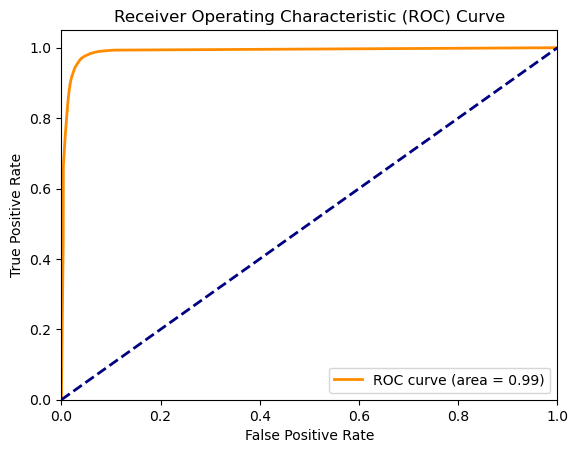

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'model' is your classifier and 'X_test', 'y_test' are your test data
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [23]:
# In order to map the flood susceptibility, we need to predict the flood susceptibility (probability between 0 and 1)
prediction_prob=model.predict_proba(X_test)

In [24]:
# The probability of being not flooded and flooded for every location ( Their summation equals 1)
prediction_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [25]:
ls=prediction_prob[:,1]
ls.shape

(184356,)

In [26]:
# As flood susceptibility is classification problem (flooded or not flooded), we can calculate some additional performance indices
#from sklearn.metrics import classification_report
#target_names=["Not Flooded","Flooded"]
#print(classification_report(y_test, prediction, target_names=target_names))


from sklearn.metrics import classification_report
import pandas as pd
target_names=["Not Flooded","Flooded"]
# Your classification report
class_report = classification_report(y_test, prediction, target_names=target_names, output_dict=True)

# Convert the classification report to a Pandas DataFrame
df_class_report = pd.DataFrame(class_report).transpose()

# Drop the 'support' column
df_class_report.drop('support', axis=1, inplace=True)

# Print the modified classification report
print(df_class_report)

              precision    recall  f1-score
Not Flooded    0.978204  0.972699  0.975444
Flooded        0.929494  0.943203  0.936298
accuracy       0.964552  0.964552  0.964552
macro avg      0.953849  0.957951  0.955871
weighted avg   0.964751  0.964552  0.964632


In [27]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, prediction))

0.9117436650959871


In [28]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, prediction))

0.9645522792857297


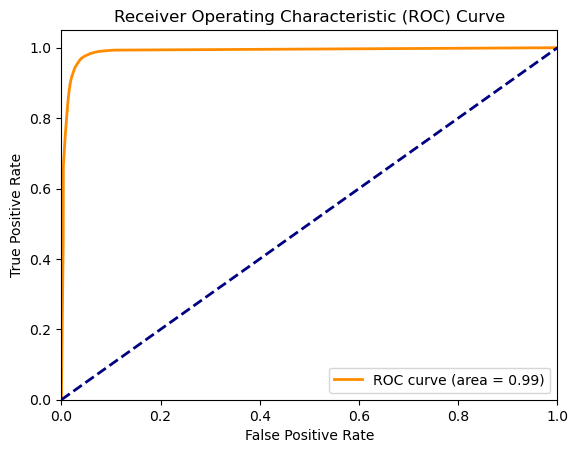

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'model' is your classifier and 'X_test', 'y_test' are your test data
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [30]:
#importances = list(model_RF.feature_importances_)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Elevation    0.759965
Slope        0.217147
Soils        0.012129
Lc           0.010760
dtype: float64


# Feature significance plot

<AxesSubplot: >

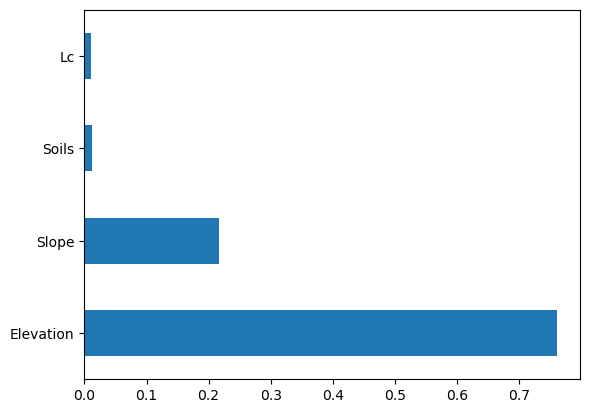

In [31]:
feature_imp.plot.barh()

In [32]:
df=pd.read_pickle("invents.pkl") # in case of pickle
df.head()

,OBJECTID_1,OBJECTID,pointid,grid_code,Label,geometry,Elevation,Slope,Soils,Lc
0,563822,590071,590071,0,0,POINT Z (2480684.910 7448277.078 0.000),0,-340282306073709652508363335590014353408.0,5,65535
1,563823,590072,590072,0,0,POINT Z (2480726.759 7448277.078 0.000),0,0.0,5,65535
2,563824,590073,590073,0,0,POINT Z (2480768.607 7448277.078 0.000),0,43.914688,2,65535
3,563825,590074,590074,96,0,POINT Z (2480810.456 7448277.078 0.000),96,43.696625,2,65535
4,563826,590075,590075,95,0,POINT Z (2480852.304 7448277.078 0.000),95,1.184414,2,65535


In [33]:
X_hotspot0= df.drop(labels = ["geometry",'Label'], axis=1) 
X_hotspot0.head()

,OBJECTID_1,OBJECTID,pointid,grid_code,Elevation,Slope,Soils,Lc
0,563822,590071,590071,0,0,-340282306073709652508363335590014353408.0,5,65535
1,563823,590072,590072,0,0,0.0,5,65535
2,563824,590073,590073,0,0,43.914688,2,65535
3,563825,590074,590074,96,96,43.696625,2,65535
4,563826,590075,590075,95,95,1.184414,2,65535


In [34]:
cols=X.columns
cols

Index(['Elevation', 'Slope', 'Soils', 'Lc'], dtype='object')

In [35]:
X_hotspot0=X_hotspot0[cols]
X_hotspot0.head()

,Elevation,Slope,Soils,Lc
0,0,-340282306073709652508363335590014353408.0,5,65535
1,0,0.0,5,65535
2,0,43.914688,2,65535
3,96,43.696625,2,65535
4,95,1.184414,2,65535


In [36]:
X_hotspot0 = X_hotspot0.dropna()

In [37]:
df=df.dropna()

In [38]:
prediction_prob=model.predict_proba(X_hotspot0)

In [39]:
prediction_prob

array([[1.        , 0.        ],
       [0.39166667, 0.60833333],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.47      , 0.53      ]])

In [40]:
ls_hotspot0=prediction_prob[:,1]
ls_hotspot0

array([0.        , 0.60833333, 0.        , ..., 1.        , 0.75      ,
       0.53      ])

In [41]:
df['FSM']=ls_hotspot0
df.head()

,OBJECTID_1,OBJECTID,pointid,grid_code,Label,geometry,Elevation,Slope,Soils,Lc,FSM
0,563822,590071,590071,0,0,POINT Z (2480684.910 7448277.078 0.000),0,-340282306073709652508363335590014353408.0,5,65535,0.000000
1,563823,590072,590072,0,0,POINT Z (2480726.759 7448277.078 0.000),0,0.0,5,65535,0.608333
2,563824,590073,590073,0,0,POINT Z (2480768.607 7448277.078 0.000),0,43.914688,2,65535,0.000000
3,563825,590074,590074,96,0,POINT Z (2480810.456 7448277.078 0.000),96,43.696625,2,65535,0.000000
4,563826,590075,590075,95,0,POINT Z (2480852.304 7448277.078 0.000),95,1.184414,2,65535,0.000000


In [42]:
import geocube
from geocube.api.core import make_geocube

geo_grid = make_geocube(
    vector_data=df,
    measurements=['FSM'],
    resolution=(-90, 90)
)

# Study Area

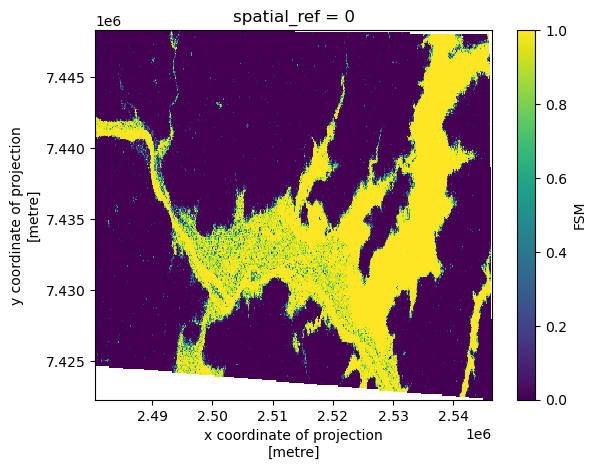

In [43]:
geo_grid.FSM.plot()